# Support Vector Machines

Support Vector Machines are a popular classification algorithm developed by the computer science community in the 1990s. There are three forms that are often all (mis)labeled as support vector machines that we'll work through in this notebook. Each form builds upon the last one leading to the final most general support vector machine.

Throughout the notebook we'll be working with synthetic data because it most easily displays how the algorithms work.

## What You'll Accomplish

<ul>
    <li>Introduce maximal margin classifiers,</li>
    <li>Extend them to soft margin classifiers,</li>
    <li>Use a soft margin classifier to classify cancer cases,</li>
    <li>Learn about support vector machines in earnest,</li>
    <li>See the kernel trick for nonlinear decision boundaries.</li>
</ul>

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Linear SVMs

This particular branch of Support Vector Machines are used to separate data you suspect have linear decision boundaries.

### Maximal Margin Classifiers

We'll start with Maximal Margin Classifiers, also known as Large Margin Classifiers.

Suppose you have data like so



In [2]:
# Generate the random data
np.random.seed(440)
n_rows = 100
diff = .1
X = np.random.random((n_rows,2))
X_prime = X[(X[:,1] - X[:,0]) <= -diff,:]
X_2prime = X[(X[:,1] - X[:,0]) >= diff,:]

del X
X = np.append(X_prime,X_2prime,axis = 0)

y = np.empty(np.shape(X)[0])
y[(X[:,1] - X[:,0]) <= -diff] = 1
y[((X[:,1] - X[:,0]) >= diff)] = 0

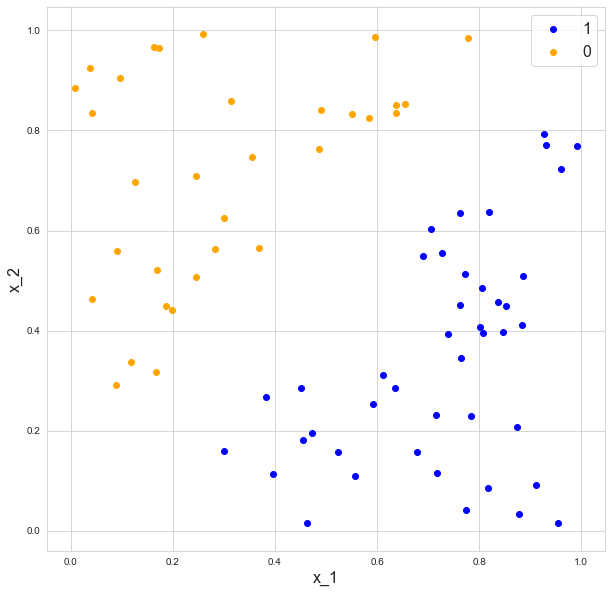

In [3]:
plt.figure(figsize = (10,10))

plt.scatter(X[y == 1,0],X[y == 1,1],c = "blue",label="1")
plt.scatter(X[y == 0,0],X[y == 0,1],c = "orange",label="0")

plt.legend(fontsize = 16)
plt.xlabel("x_1",fontsize = 16)
plt.ylabel("x_2",fontsize = 16)

plt.show()

How would you go about writing a decision rule for this data set? We don't need a specific formula, do your best just using words.

<br>
<br>
<br>
<br>
<br>
<br>
<b>Spoilers Below</b>
<br>
<br>
<br>
<br>
<br>
<br>
You can separate these two classes perfectly with a simple straight line, and more generally what's known as a hyperplane. 

If you're unfamiliar with the term hyperplane here's how to think about it, take a high dimensional space, any subspace that is one dimension lower is a hyperplane. So in $\mathbb{R}^1$ a hyperplane is a point, in $\mathbb{R}^2$ a hyperplane is a line, in $\mathbb{R}^3$ a hyperplane is a $2$-D plane, and in $\mathbb{R}^n$ it is an $n-1$ subspace.

The question becomes what is the best line with which to separate these points? That is what the maximal margin classifier finds! Below are three examples of separating lines.

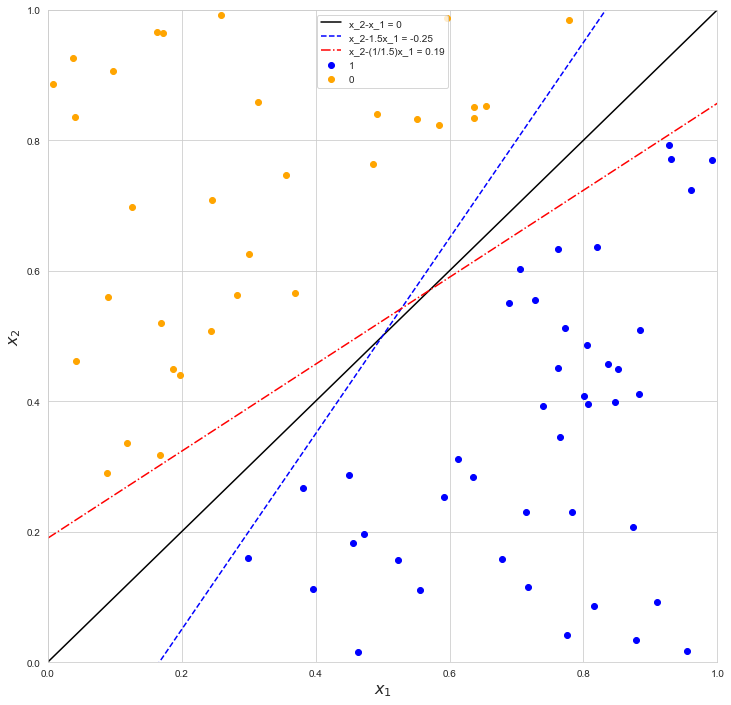

In [5]:
plt.figure(figsize = (12,12))

plt.scatter(X[y == 1,0],X[y == 1,1],c = "blue",label="1")
plt.scatter(X[y == 0,0],X[y == 0,1],c = "orange",label="0")
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'k',label="x_2-x_1 = 0")
plt.plot(np.linspace(0,1,100),1.5*np.linspace(0,1,100)-.25,'b--',label="x_2-1.5x_1 = -0.25")
plt.plot(np.linspace(0,1,100),(1/1.5)*np.linspace(0,1,100)+.19,'r-.',label = "x_2-(1/1.5)x_1 = 0.19")


plt.xlabel("$x_1$",fontsize = 16)
plt.ylabel("$x_2$",fontsize = 16)

plt.xlim((0,1))
plt.ylim((0,1))
plt.legend()
plt.show()

All three of these lines separate the two classes, but which one do you think will best generalize to future data points?

The red dot-dash and blue dotted lines get a bit to close to the training data at certain points. If we use one of those two lines, it is likely that new observations (which you'd want to classify) will deviate to the wrong side of the decision boundary because of random noise. So what to do?

One approach is to draw a hyperplane that maximizes the total distance from all points to the hyperplane. Another way to think about it is to draw a hyperplane, find the minimum distance from the points to the hyperlane (known as the <i>margin</i>), then make that as large as possible (<i>maximize</i> it). Hence the name <i>maximal margin classifier</i>.

Let's see how to implement a maximal margin classifier in `sklearn`.

In [6]:
# First import the classifier
from sklearn.svm import LinearSVC

In [7]:
# Now we make the classifier
# For now don't worry about c, we'll talk about it soon
# Same with loss
max_margin = LinearSVC(C=1, loss="hinge")

In [8]:
# You can take over here
# fit the model
max_margin.fit(X,y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [9]:
def plot_bound(clf,X,y,pts = False):
    plt.figure(figsize = (10,10))
    coefs = clf.coef_[0]
    intercept = clf.intercept_[0]
    
    if coefs[0] != 0:
        plt.plot(np.linspace(np.min(X[:,0]),np.max(X[:,0]),1000),
                     (-intercept/coefs[1])-(coefs[0]/coefs[1])*np.linspace(np.min(X[:,0]),np.max(X[:,0]),1000),
                        'k',label = "SVM Boundary")
    else:
        plt.plot((-intercept/coefs[0])*np.ones(1000),
                     np.linspace(np.min(X[:,1],np.max(X[:,1]),1000),
                        'k'),label = "SVM Boundary")
        
    if pts:
        plt.scatter(X[y == 0,0],X[y == 0,1],color="orange",label="0",s=50)
        plt.scatter(X[y == 1,0],X[y == 1,1],color="blue",label="1", alpha = 1,s=50)

        plt.legend(fontsize=16)

    plt.xlabel("$x_1$",fontsize=16)
    plt.ylabel("$x_2$",fontsize=16)
    plt.title("Decision Boundary",fontsize = 20)
    

    plt.show()

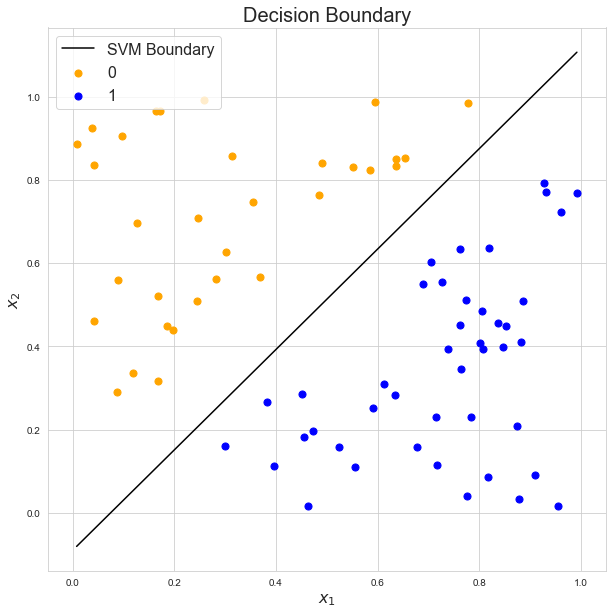

In [10]:
# Plot the decision boundary in black
plot_bound(max_margin,X,y,True)

Alright let's get some practice now with our old friend the iris data set.

## Practice

#### Maximal Margin Classifying Irises

First import the data and make a training test split, set aside $20\%$ for testing.

Then play around and find two features that look like they could be used to separate setosa irises from non-setosa irises. Note that setosas are coded as $0$ in `iris[target]`. Once you've found two features that you think are linearly separable fit the classifier using them. Note that SVMs are sensitive to the scale of the variables, so you'll need to build a pipeline here using `StandardScaler` as your scaler. Remember we did this back in the regression notebook if you need a refresher.

In [24]:
## Import the data here
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

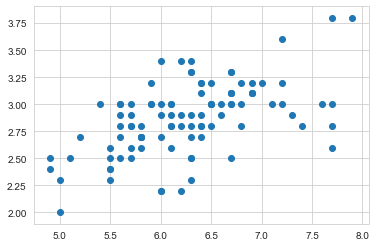

In [28]:
# Get the data and the targets here 
# Grab Features
X = iris['data']

# Grab Targets
y = np.ones(np.shape(iris['target']))
# Reclassify as setosa and not setosa
y = np.where(iris['target']!=0, 0, y)
plt.scatter(X[y == 0,0],X[y == 0,1])

In [25]:
# Make the train test split here
# Use 440 as the random_state
# remember to stratify
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Code here





In [ ]:
# Search for features with plots here







In [60]:
# Fit your model here 
# First a note!
# SVMs are incredibly scale sensitive
# So use the standard scaler on your data first.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Create a pipeline here
# Call the pipeline max_margin






In [ ]:
# Now fit the classifier






In [ ]:
# Plot your boundary using plot_bounds
# Remember you'll need to scale X again
# Use StandardScaler().transform
plot_bound(max_margin['clf'],
           max_margin['scaler'].transform(X_train[:,[feat_1,feat_2]]),
           y_train,True)

##### Shortly, Back to Margins

Earlier we defined the margin. Pop quiz what is a margin in this context?

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<b>Spoilers</b>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
Answer: The minimum distance from the hyperplane to any point in the training set.

Looking at the plot above we can see that the maximal margin classifier is what is known as a hard margin classifier, meaning that the algorithm will not allow any training points within the margins of the decision boundary.

In [ ]:
# We won't spend time optimizing here, go ahead and predict
# on your test set and find the test accuracy






Now as you may have guessed the maximum margin classifier is very sensitive to the training data. In particular data points on the edges of the margin, these are known as the <i>support vectors</i>. For instance, for the iris example we just worked with, the test set had an observation almost on our decision boundary. If this point were in the training set instead we would probably have a different decision boundary.

Also note, that while we only worked with two classes, this algorithm can be extended to suport mulitple classes (see the HW).

### Support Vector Classifiers (or Soft Margin Classifiers)

Okay so we now have an algorithm that can separate groups that are separable by hyperplanes. But, there are two possible issues:
<ol>
    <li>Your data may not be able to be separated by a hyperplane</li>
    <li>A hard margin classifier may be too sensitive to training data</li>
</ol>

We saw an example of 2 with the iris data test and train sets. For an example of 1 look at our phony data from before but with some slight alterations. 

In [29]:
# Generate the random data
np.random.seed(440)
n_rows = 100
diff = .1
X = np.random.random((n_rows,2))
X_prime = X[(X[:,1] - X[:,0]) <= -diff,:]
X_2prime = X[(X[:,1] - X[:,0]) >= diff,:]
X_3prime = [[.4,.9],[.6,.45],[.7,.9],[.3,.19],[.1,.4]]

del X
X = np.append(X_prime,np.append(X_2prime,X_3prime,axis = 0),axis=0)

y = np.empty(np.shape(X)[0])
y[(X[:,1] - X[:,0]) <= -diff] = 1
y[((X[:,1] - X[:,0]) >= diff)] = 0
y[-5] = 1
y[-4] = 0
y[-3] = 1
y[-2] = 0
y[-1] = 1

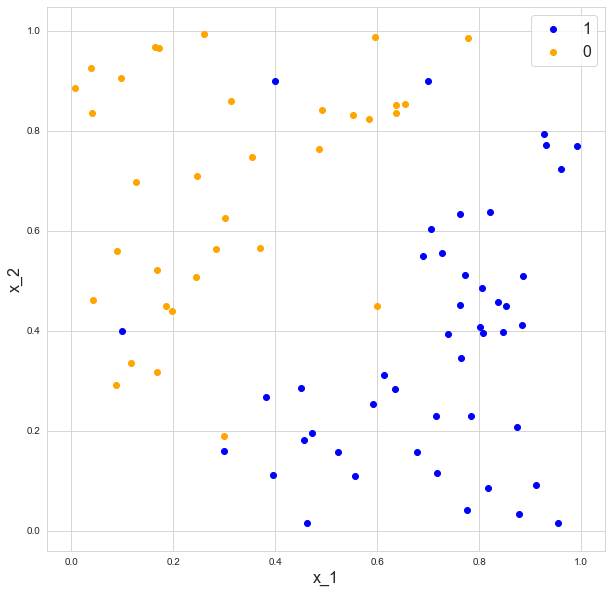

In [30]:
plt.figure(figsize = (10,10))

plt.scatter(X[y == 1,0],X[y == 1,1],c = "blue",label="1")
plt.scatter(X[y == 0,0],X[y == 0,1],c = "orange",label="0")

plt.legend(fontsize = 16)
plt.xlabel("x_1",fontsize = 16)
plt.ylabel("x_2",fontsize = 16)

plt.show()

Is this new version of the data set linearly separable?

<br>
<br>
<br>
<br>
<br>
<br>
<b>Spoilers Below</b>
<br>
<br>
<br>
<br>
<br>
<br>
No.

But, they are almost linearly separable. 

If we're willing to not have a perfect separation we can still use the maximal margin classifier as our guide for a new algorithm.

#### Soften up the Margin Before Classifying

As we said before the maximal margin classifier is a <i>hard margin classifier</i>, meaning that instances of class $0$ are not allowed to cross the decision boundary over into the area occupied by class $1$. But, what if we relaxed that rule.

`LinearSVC` is constructed to be a soft margin classifier by default. This makes sense because if a dataset is linearly separable the maximal margin classifier can be achieved by the soft margin classifier. Now that we have decided to relax how hard our margins are, we have an extra feature of the algorithm to play around with, the "softness" of the margin.


This is where the hyperparameter $C$ in `LinearSVC` comes into play. This is a regularization parameter and it is quite similar to what we did in ridge regression. Here's a basic rundown of how different values of $C$ affect the hyperplane. When $C$ is small the algorithm looks to find as large a margin as possible and is okay with a few observations that end up misclassified. In the small $C$ scenario we are less concerned with fitting the training data as perfectly as possible which gives a higher bias but lower variance. In contrast, a larger $C$ leads to an algorithm the tries to fit the training data as well as it can. This leads to a narrower margin with very few misclassifications (in the training data). The large $C$ approach highly fits the training data and therfore has a higher variance but lower bias.

The $C$ value that works best for your data depends and you will need to do something like a grid search to find the best one.


Below we play around with different values of $C$ when fitting a soft margin classifier to the phony data, use `plot_bound` to see how it moves the decision boundary.

C is 0.01


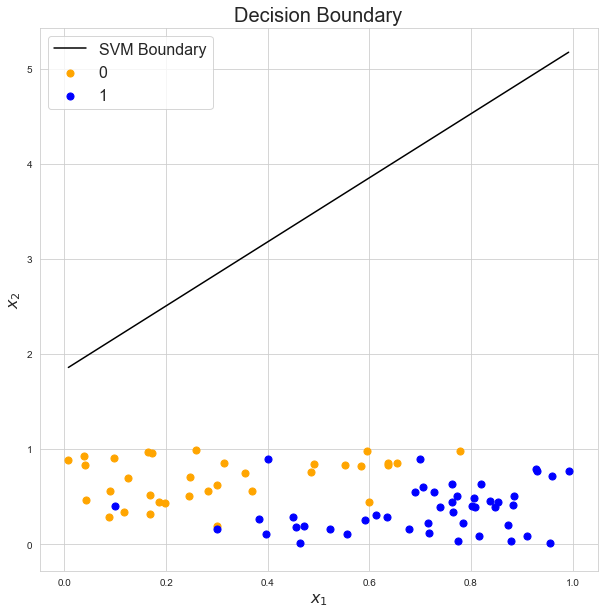

C is 0.1


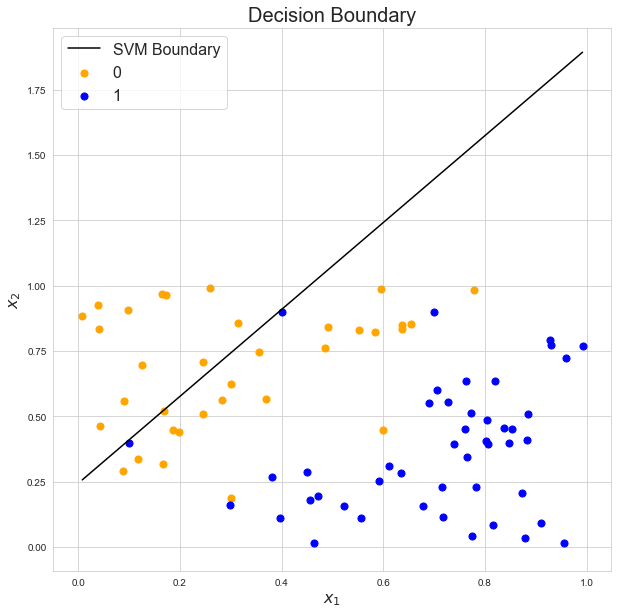

C is 0.2


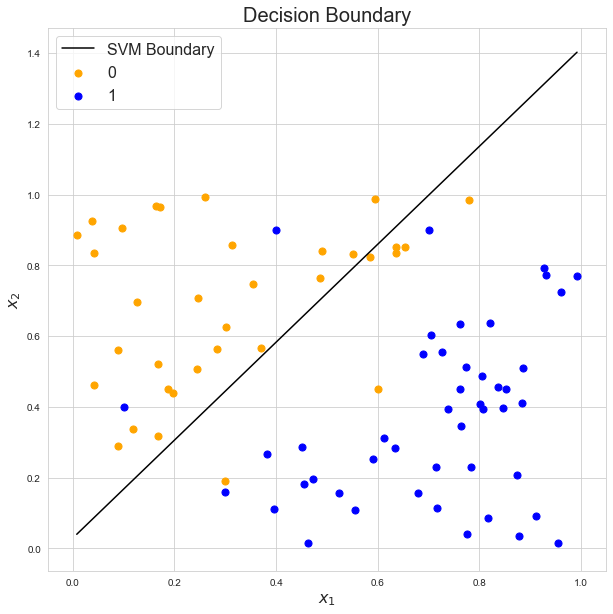

C is 0.3


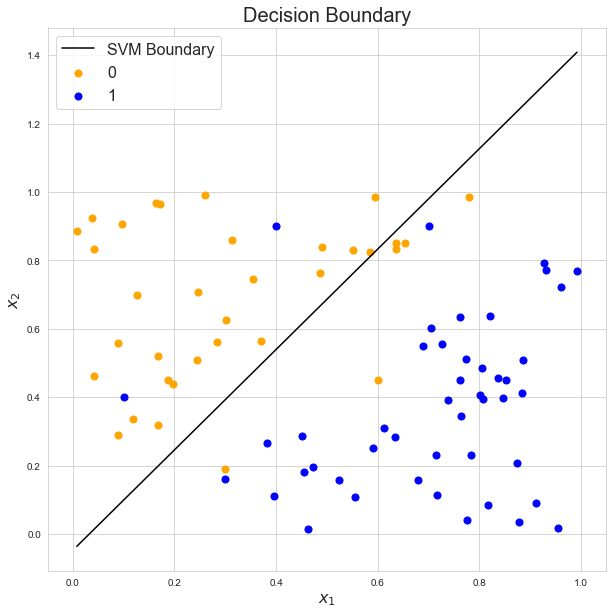

C is 0.5


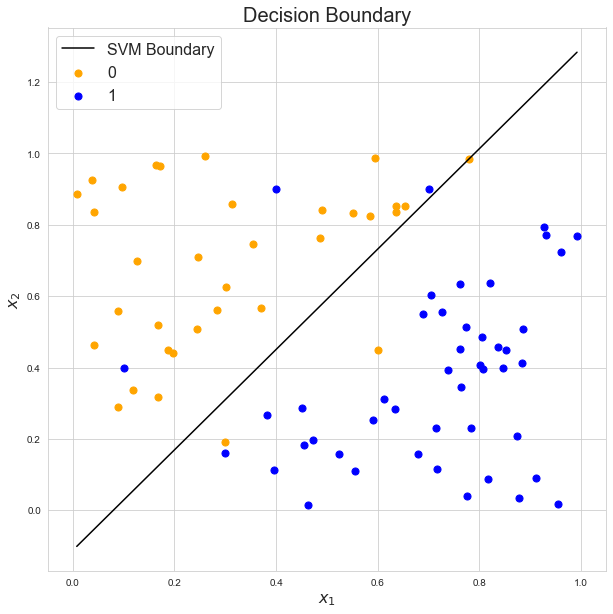

C is 0.75


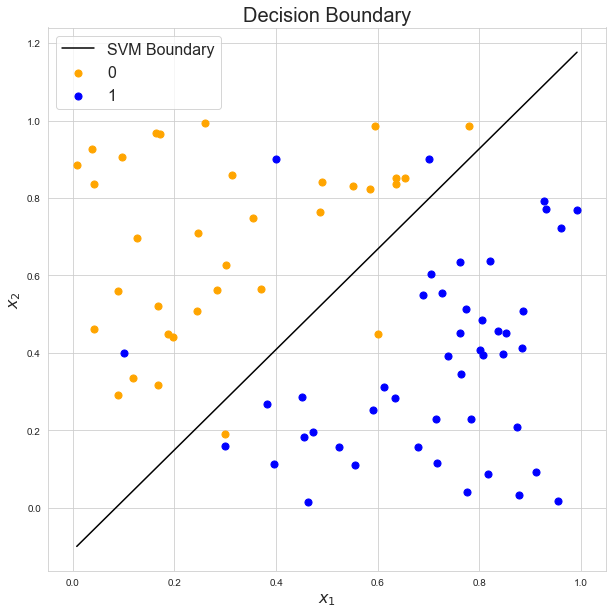

C is 5


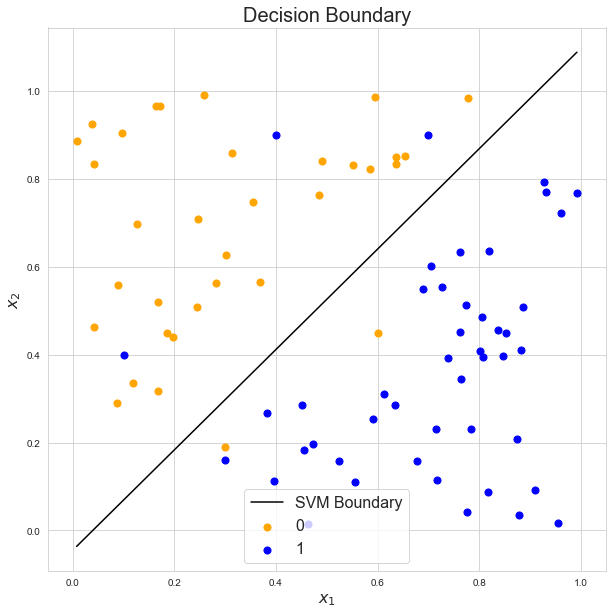

/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C is 10


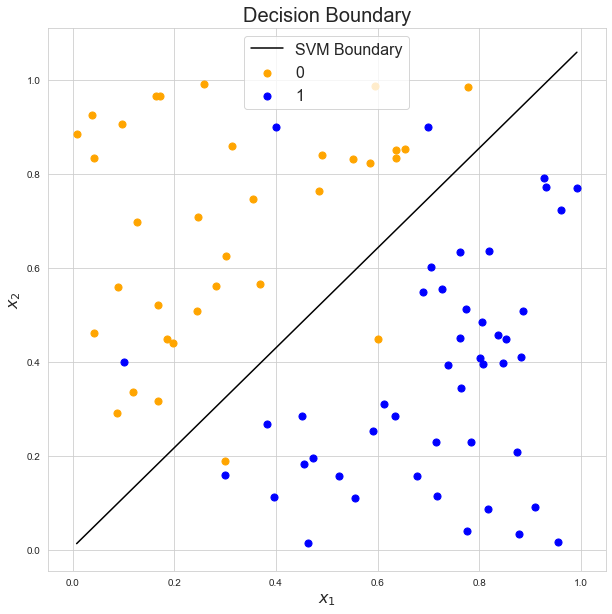

/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C is 50


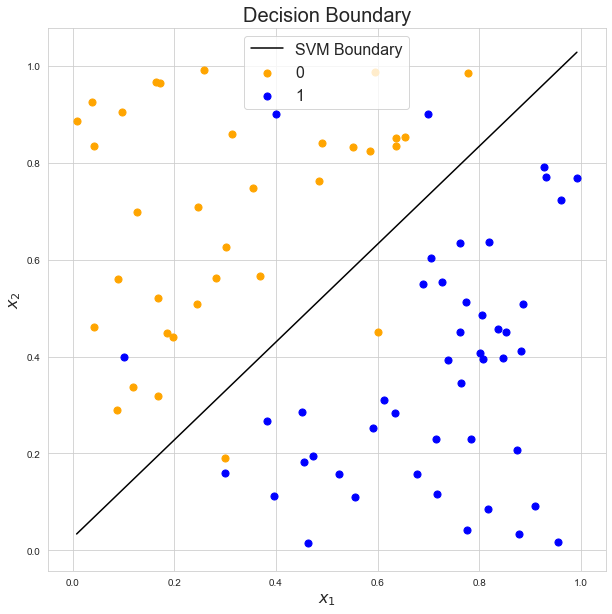

/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C is 100


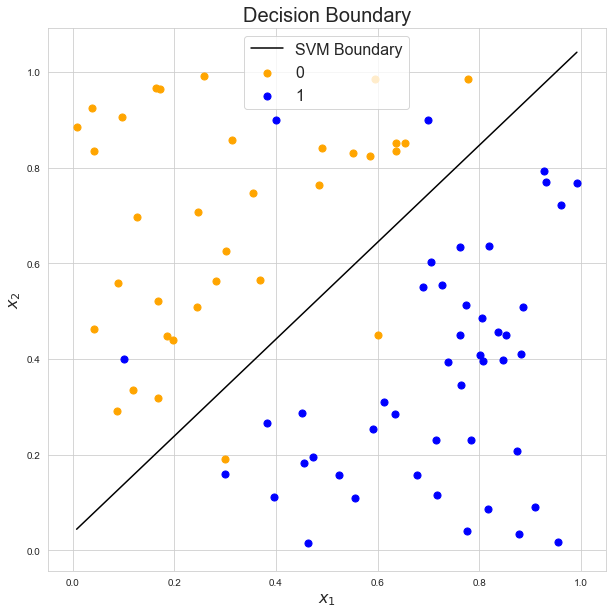

In [31]:
# Code here
# Sample Solution
for i in [.01,.1,.2,.3,.5,.75,5,10,50,100]:
    test = LinearSVC(C=i, loss="hinge")
    test.fit(X,y)

    print("C is", i)
    plot_bound(test,X,y,True)

## Practice

#### Using C to Classify Cancer Diagnoses

We'll now implement a support vector classifier on a processed version of the popular <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">Wisconsin Breast Cancer Dataset</a>. This data was collected by researchers at the University of Wisconsin and each observation represents various measurements of a breast tumor as well as whether or not the observation was benign or malignant.

We can download this data set using `sklearn`, but instead we'll load a version of the data that has been put through Principal Components Analysis (PCA). We'll cover this algorithm in the Unsupervised Learning section of the course, as well as how to properly implement it in a machine learning pipeline. For now take the data we load below as is.

In [32]:
from sklearn.model_selection import train_test_split
# import the data set
cancer = pd.read_csv("cancer_pca.csv")

X = cancer[['pca_1','pca_2']]
y = cancer['cancer_outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,random_state=440,test_size = .25,stratify = y)

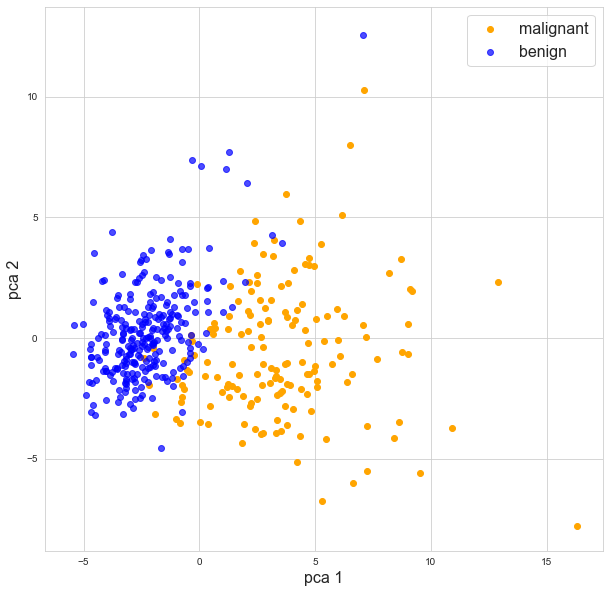

In [33]:
plt.figure(figsize=(10,10))

plt.scatter(X_train.loc[y_train==0,'pca_1'],X_train.loc[y_train==0,'pca_2'],c = 'orange',label="malignant")
plt.scatter(X_train.loc[y_train==1,'pca_1'],X_train.loc[y_train==1,'pca_2'],c = 'blue',label="benign",alpha = .7)

plt.legend(fontsize = 16)
plt.xlabel("pca 1",fontsize = 16)
plt.ylabel("pca 2",fontsize = 16)

plt.show()

These data seem close to linearly separable. Your job is to build a linear support vector classifier to try and classify the malignant and benign classes. As always think about the best performance measure for this problem, and optimize your hyperparameters for that measure.

In [52]:
## Code here

test = LinearSVC(C=i, loss="hinge")
fit = test.fit(X,y)
# plot_bound(test,X,y,False)
np.max(X[0])
coefs = fit.coef_[0]
intercept = fit.intercept_[0]
plt.plot(np.linspace(np.min(X[:,0]),np.max(X[:,0]),1000),
                     (-intercept/coefs[1])-(coefs[0]/coefs[1])*np.linspace(np.min(X[:,0]),np.max(X[:,0]),1000),
                        'k',label = "SVM Boundary")






/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KeyError: 0

In [ ]:
## Code here











In [ ]:
## Code here













In [ ]:
## Code here










## Non-Linear SVMs

Up until now we've dealt with data that can be separated completely (or close to completely) with a hyperplane (a line in $2$-D).

What about data like this?

In [53]:
# Import make_circles function
from sklearn.datasets import make_circles

In [54]:
# Generate data
X, y = make_circles(n_samples=500, factor=.3, noise=.1)

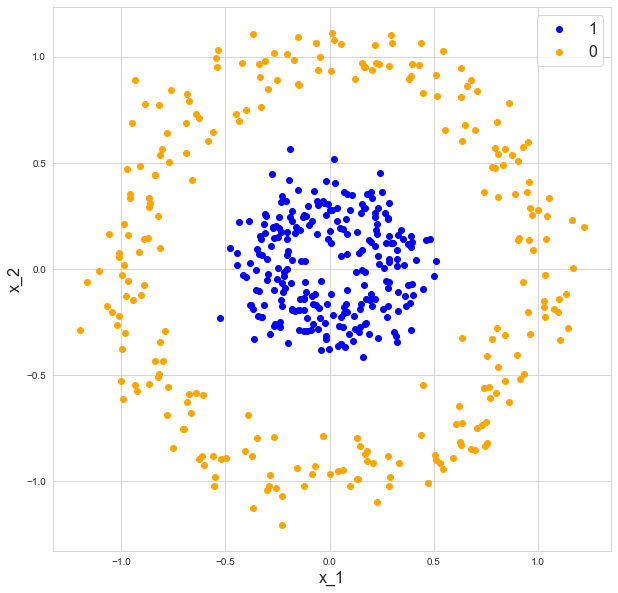

In [55]:
plt.figure(figsize = (10,10))

plt.scatter(X[y == 1,0],X[y == 1,1],c = "blue",label="1")
plt.scatter(X[y == 0,0],X[y == 0,1],c = "orange",label="0")

plt.legend(fontsize = 16)
plt.xlabel("x_1",fontsize = 16)
plt.ylabel("x_2",fontsize = 16)

plt.show()

Clearly this data seems separable, but not by a line.

Here's another even simpler example.

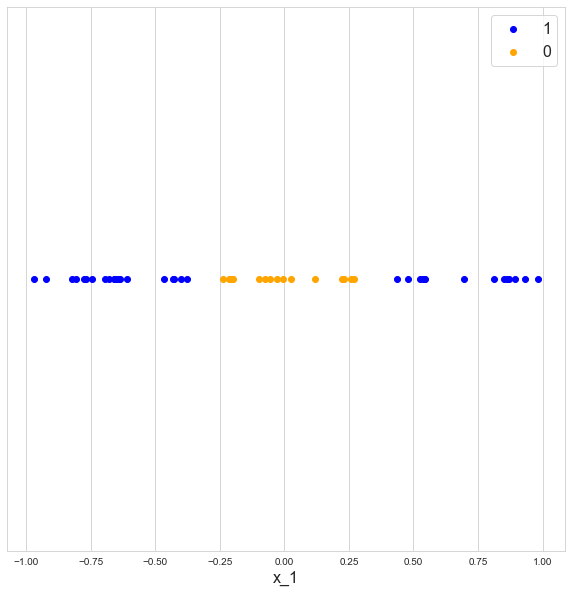

In [56]:
np.random.seed(440)

X = 2*np.random.random((50,1)) - 1
y = np.ones(np.shape(X))

plt.figure(figsize=(10,10))


plt.scatter(X[(X > .3) | (X < -.3)],y[(X > .3) | (X < -.3)],c="blue",label="1")
plt.scatter(X[(X <= .3) & (X >= -.3)],y[(X <= .3) & (X >= -.3)],c="orange",label="0")
plt.yticks([])

plt.legend(fontsize=16)
plt.xlabel("x_1",fontsize=16)

plt.show()

This is also not separable by a linear boundary.

Not to worry in these scenarios we do still have a couple tricks up our sleeve.

### Adding Nonlinear Transformations of Our Terms

Just like with linear regression, one technique is to perform nonlinear transformations of our predictors. This will then lift our data into a higher dimensional space that is linearly separable.

Let's try this with the data we just looked at.

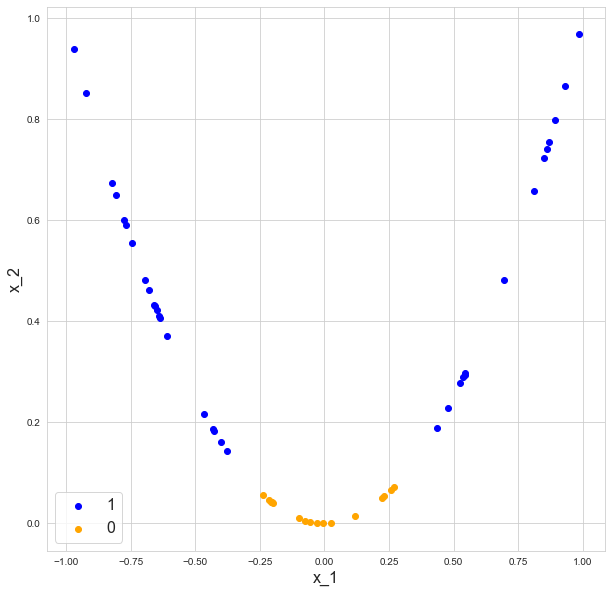

In [57]:
## Add a feature x_2 to X, that is just x_1^2
## make sure it is an np array with the first column as x_1
## and the second column as x_2
X = np.append(X,X**2,axis=1)
y[(X[:,0] <= .3) & (X[:,0] >= -.3)] = 0

## Now plot it using the below code
plt.figure(figsize=(10,10))


plt.scatter(X[(X[:,0] > .3) | (X[:,0] < -.3),0],X[(X[:,0] > .3) | (X[:,0] < -.3),1],c="blue",label="1")
plt.scatter(X[(X[:,0] <= .3) & (X[:,0] >= -.3),0],X[(X[:,0] <= .3) & (X[:,0] >= -.3),1],c="orange",label="0")


plt.legend(fontsize=16)
plt.xlabel("x_1",fontsize=16)
plt.ylabel("x_2",fontsize=16)

plt.show()

In [58]:
from sklearn.preprocessing import PolynomialFeatures

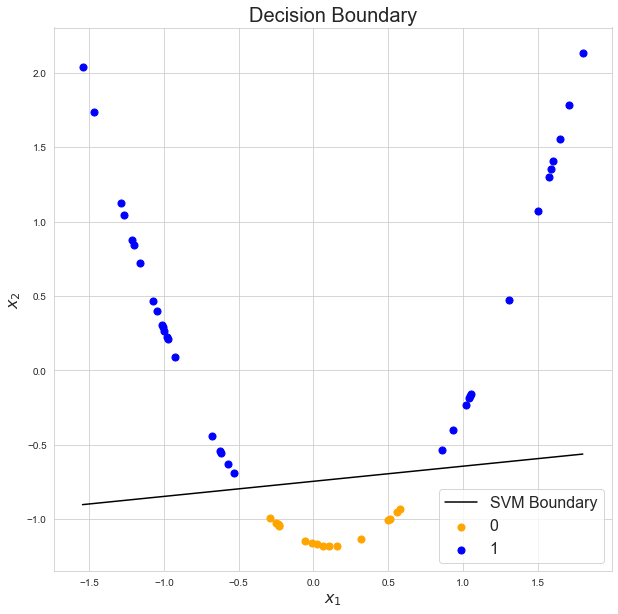

In [61]:
# LinearSVC can find a perfectly classifying decision boundary
clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=5,loss="hinge"))
])



clf.fit(X[:,0].reshape(-1,1),y.ravel())

poly = clf.named_steps['poly_features']
scaler = clf.named_steps['scaler']

plot_bound(clf.named_steps['svm_clf'],scaler.fit_transform(poly.fit_transform(X[:,0].reshape(-1,1))),y.ravel(),True)

Sometimes this sort of technique works well for your data. However, a couple issues could arise:
<ol>
    <li>Polynomials of too low degree cannot fit complicated decision boundaries</li>
    <li>Polynomials of high degree introduce too many features which makes the algorithm slow</li>
</ol>

Luckily there is a different way to think about the problem!

### The Kernel Trick

The idea behind the kernel trick builds off of what we just did. In the previous section we took a one dimensional data set and lifted it into a two dimensional space where it could be separated. This is the essential idea behind the kernel trick. We want to transform our feature space using some function $\phi$ into a higher dimensional feature space. However, as we mentioned doing this can created a lot of features and make our algorithm too slow to be useful. This is mainly because, without opening the mathematical hood too much, the algorithm has to compute a dot product between the transformed feature vectors.

For example let's say our data has two features $x_1$ and $x_2$ and our $\phi$ is like so:
$$
\phi\left(\left(.\begin{array}{c} x_1 \\ x_2 \end{array} \right)\right) = \left(\begin{array}{c} x_1^2 \\ \sqrt{2} x_1 x_2 \\ x_2^2 \end{array} \right).
$$
For two vectors $a$ and $b$ the dot product between $\phi(a)$ and $\phi(b)$ is:
$$
\phi(a) \bullet \phi(b) = a_1^2 b_1^2 + 2 a_1b_1a_2b_2 + a_2^2b_2^2 = (a_1 b_1 + a_2 b_2)^2 = (a \bullet b)^2
$$

So even though we knew what the map $\phi$ was to the higher space, we didn't need to know what it was to compute the dot product $\phi(a) \bullet \phi(b)$!

In this context a map $\phi$ has a <i>kernel function</i>, $K$, if $\phi(a) \bullet \phi(b) = K(a,b)$ where $K$ is only a function of $a$ and $b$ in the original feature space. So for the example mapping we looked at the kernel function is $K(a,b) = (a \bullet b)^2$.

Other common kernel functions are:
<ul>
    <li>Linear, $K(a,b) = a \bullet b$, this gives the linear classifiers we looked at earlier,</li>
    <li>Polynomial, $K(a,b) = (\gamma a\bullet b + r)^d$, where $\gamma$ is a hyperparameter to be tuned,</li>
    <li>Gaussian Radial Kernel (Gaussian RBF), $K(a,b) = \exp\left( -\gamma ||a-b||^2 \right)$, where $||\bullet ||$ is the Euclidean norm,</li>
    <li>Sigmoid, $K(a,b) = \tanh(\gamma a \bullet b + r)$
</ul>

To allow you more time to play around with SVMs in `sklearn` we'll devote the rest of this notebook to coding. 

##### Using the Kernel Trick in `sklearn`

Now that we've introduced the kernel trick we can actually use the `SVC` object in `sklearn`, there's a reason we've waited so long though, but first let's return to our $1$-D data one more time.

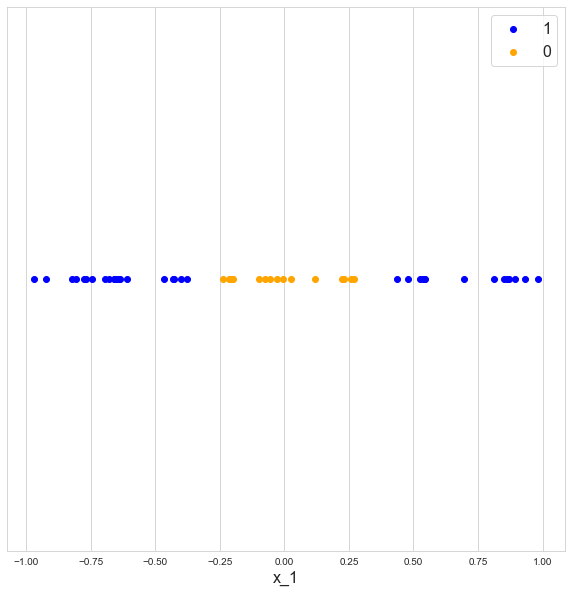

In [62]:
plt.figure(figsize=(10,10))


plt.scatter(X[(X[:,0] > .3) | (X[:,0] < -.3),0],np.ones((np.shape(X)[0],1))[(X[:,0] > .3) | (X[:,0] < -.3)],c="blue",label="1")
plt.scatter(X[(X[:,0] <= .3) & (X[:,0] >= -.3),0],np.ones((np.shape(X)[0],1))[(X[:,0] <= .3) & (X[:,0] >= -.3)],c="orange",label="0")
plt.yticks([])

plt.legend(fontsize=16)
plt.xlabel("x_1",fontsize=16)

plt.show()

Instead of using a polynomial transform by hand we can use the SVM with a polynomial kernel function.

In [63]:
# First import SVC
from sklearn.svm import SVC

In [64]:
# Now create an SVC instance with polynomial kernel
svm_clf = SVC(kernel = "poly", degree = 2, coef0 = 1, C=1)

# Fit, remember to only use the 0th column of X
svm_clf.fit(X[:,0].reshape(-1,1),y.ravel())

/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
# We'll use this to test the SVM we just made
test = np.linspace(-1,1,1000)

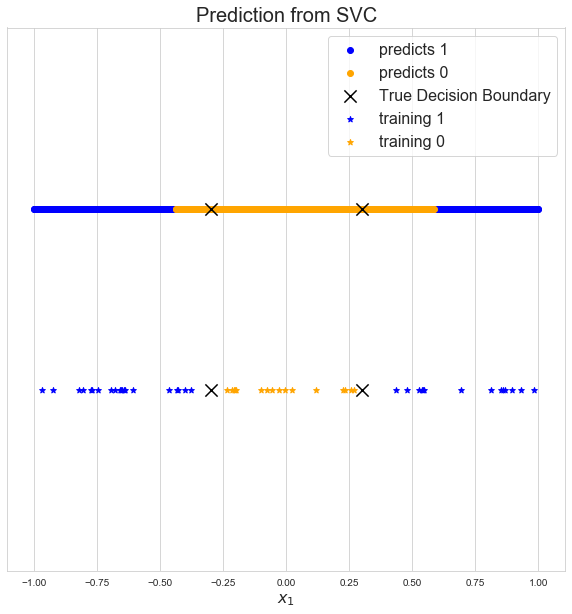

In [66]:
# predict on test
pred = svm_clf.predict(test.reshape(-1,1))

# Now plot the prediction along with the true boundary
# and the training data
plt.figure(figsize = (10,10))

# plot the predictions
plt.scatter(test[pred == 1],np.ones(np.shape(test))[pred == 1],c = "blue",label="predicts 1")
plt.scatter(test[pred == 0],np.ones(np.shape(test))[pred == 0],c = "orange",label="predicts 0")

# Plot the true boundary
plt.scatter([0.3,-0.3,0.3,-0.3],[1,1,.9,.9],c = "black",marker="x",s = 150,label="True Decision Boundary")

# plot the training data
plt.scatter(X[(X[:,0] > .3) | (X[:,0] < -.3),0],
            .9*np.ones((np.shape(X)[0],1))[(X[:,0] > .3) | (X[:,0] < -.3)],
            c="blue",label="training 1",marker="*")
plt.scatter(X[(X[:,0] <= .3) & (X[:,0] >= -.3),0],
            .9*np.ones((np.shape(X)[0],1))[(X[:,0] <= .3) & (X[:,0] >= -.3)],
            c="orange",label="training 0",marker="*")

plt.yticks([])
plt.ylim([.8,1.1])
plt.xlabel("$x_1$",fontsize = 16)
plt.legend(fontsize=16)

plt.title("Prediction from SVC",fontsize = 20)

plt.show()



Before we let you play around with kernels a quick note. If you suspect that your boundary is linear or a low degree polynomial, use `LinearSVC`. Why? Because the algorithm being run on your computer (or server) when you use `LinearSVC` is optimized for such a problem, so it will run better than `SVC` with a linear or low degree polynomial kernel.

## Practice

Now go ahead and work on the following two problems for the rest of the notebook. Use a support vector machine with kernels to build a classifier for the circles data set and moons data set given below. 

For both what kernel and hyperparameters give you the best accuracy, precision, recall, and auc scores?

In [67]:
# Circle Data Set
X_train, y_train = make_circles(n_samples=500, factor=.4, noise=.15)
X_test, y_test = make_circles(n_samples=100, factor=.4, noise=.15)

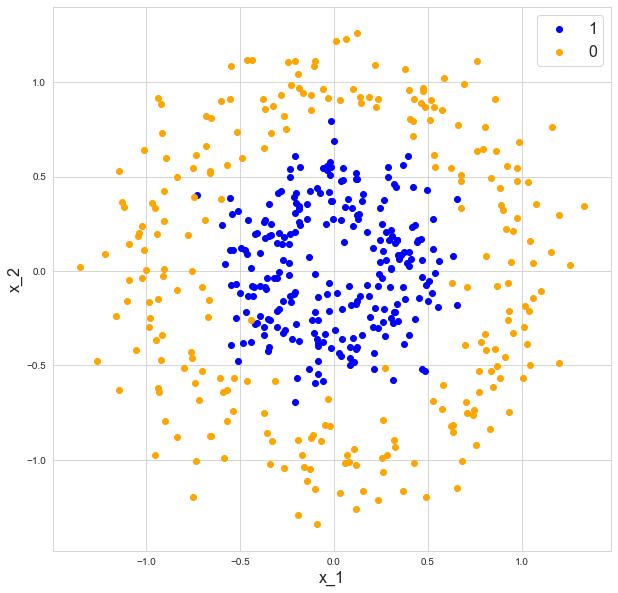

In [68]:
# Plot it
plt.figure(figsize = (10,10))

plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],c = "blue",label="1")
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],c = "orange",label="0")

plt.legend(fontsize = 16)
plt.xlabel("x_1",fontsize = 16)
plt.ylabel("x_2",fontsize = 16)

plt.show()

/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


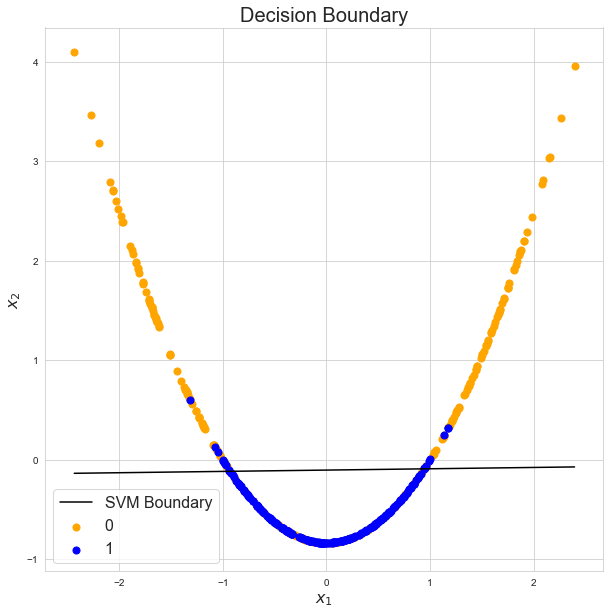

In [84]:
# Your Code here
# Now create an SVC instance with polynomial kernel
clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=5,loss="hinge"))
])



clf.fit(X_train[:,0].reshape(-1,1),y_train.ravel())

poly = clf.named_steps['poly_features']
scaler = clf.named_steps['scaler']

plot_bound(clf.named_steps['svm_clf'],scaler.fit_transform(poly.fit_transform(X_train[:,0].reshape(-1,1))),y_train.ravel(),True)
# plot_bound(clf.named_steps['svm_clf'],scaler.fit_transform(poly.fit_transform(X_test[:,0].reshape(-1,1))),y_test.ravel(),True)
pred = clf.predict(X_test[:,0].reshape(-1,1))



In [96]:
# Your Code here
## Put More Code Here
# Making function to calculate various stats
## Accuracy
def get_acc(prediction,y):
    return np.round(np.sum(prediction == y)/len(y),5)*100
## Precision
def get_prec(prediction,y):
    positives = prediction[prediction == 1]
    return np.round(np.sum(positives == y[prediction == 1])/len(positives),5)*100
## Recall
def get_recall(prediction,y):
    ones = y[y==1]
    return np.round(np.sum(prediction[y==1] == ones)/len(ones),5)*100


print(get_acc(pred,y_test.ravel()), get_prec(pred,y_test.ravel()), get_recall(pred,y_test.ravel()))

#Need to make a loop to test other hyper parameters and Kernels

69.0 72.09299999999999 62.0


In [86]:
# Moons Data Set
from sklearn.datasets import make_moons

In [87]:
# Make data
X_train,y_train = make_moons(n_samples=500, shuffle=True, noise=.3, random_state=614)
X_test,y_test = make_moons(n_samples=100, shuffle=True, noise=.3, random_state=614)

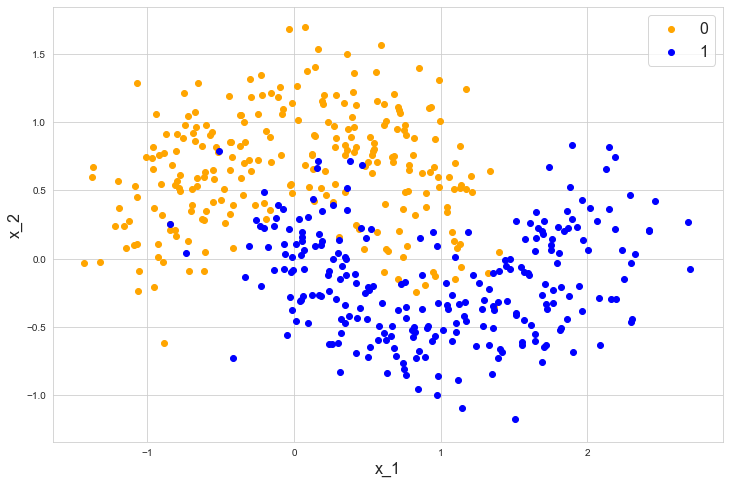

In [88]:
# Plot the data with labels
plt.figure(figsize = (12,8))
           
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color="orange",label="0")
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],color="blue",label="1")

plt.legend(fontsize=16)

plt.xlabel("x_1",fontsize=16)
plt.ylabel("x_2",fontsize=16)

plt.show()

In [102]:
# Your code here
svm_clf = SVC(kernel = "rbf", degree = 2, coef0 = 1, C=1)

clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=50,loss="hinge"))
])



clf.fit(X_train[:,0].reshape(-1,1),y_train.ravel())

poly = clf.named_steps['poly_features']
scaler = clf.named_steps['scaler']

plot_bound(clf.named_steps['svm_clf'],scaler.fit_transform(poly.fit_transform(X_train[:,0].reshape(-1,1))),y_train.ravel(),True)
# plot_bound(clf.named_steps['svm_clf'],scaler.fit_transform(poly.fit_transform(X_test[:,0].reshape(-1,1))),y_test.ravel(),True)
pred = clf.predict(X_test[:,0].reshape(-1,1))






AttributeError: coef_ is only available when using a linear kernel

<Figure size 720x720 with 0 Axes>

In [100]:
# Your code here 


print(get_acc(pred,y_test.ravel()), get_prec(pred,y_test.ravel()), get_recall(pred,y_test.ravel()))

#Need to make a loop to test other hyper parameters and Kernels






68.0 71.429 60.0


In [ ]:
# Your code here








In [ ]:
# Your code here








### Getting scores for AUC

This is the first algorithm we've encountered that doesn't seem to have a natural class probability measurement. Luckily it can be done, but it is a slightly different procedure than what we've done with past algorithms.

For SVMs you need to include the argument `probability=True` when you create the classifier object. Then you can generate probabilities using `predict_proba` as before. See below for an example.

In [ ]:
# Use whatever SVM you used to classify the circle data set here
svm_clf = SVC(kernel = "rbf", C=1,probability=True)


svm_clf.fit(X_train,y_train)

svm_clf.predict_proba(X_test)